In [22]:
import osmnx as ox
import networkx as nx
import ast
import sys
import json
# Change this for your local machine
sys.path.append("C:\\Users\\gabri\\Documents\\CMOR492-DWS")
from network_construction.network import get_Utown, source_treatment

MultiDiGraph with 199 nodes and 506 edges


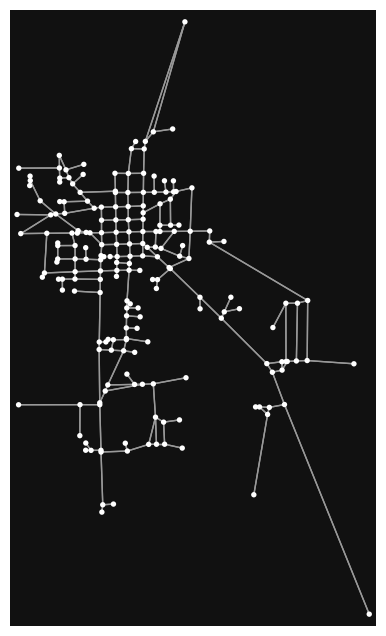

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [29]:
G0 = ox.load_graphml("road_net_2.graphml")
print(G0)
ox.plot_graph(G0)

# Why we're getting a `crs` attribute error
It's because we're copying some but not all attributes of the OSMnx multidigraph to a fresh digraph.

OSMnx gives us a directional multigraph from the .graphml file, with multiple edges between nodes representing different directions of travel along the same path. However, we don't care which direction the roads go in. The cell directly below copies some attributes of the multidigraph into a new digraph.

However, OSMnx provides internal methods for converting the original multidigraph to a graph, which is all we need.

In [40]:
G_temp = nx.MultiDiGraph()
G_temp.add_nodes_from(G0.nodes(data=True))

In [41]:
G_temp[list(G0)[0]]

AdjacencyView({})

In [ ]:
G_digraph = nx.MultiDiGraph()

# Copy nodes and their attributes
G_digraph.add_nodes_from(G0.nodes(data=True))

# Iterate through edges and add them to the new graph
for edge_key in G0.edges.keys:
    if edge_key not in G_digraph.edges.keys:
        G_digraph.add_edge(G0[edge_key])
    u, v = edge[0], edge[1]
    attr = edge[2]
    G_digraph.add_edge(u, v, **attr)

source_nodes, treatment_nodes = source_treatment(G_digraph)

In [39]:
G0.graph["crs"]
G_digraph.graph["crs"]

KeyError: 'crs'

KeyError: 'crs'

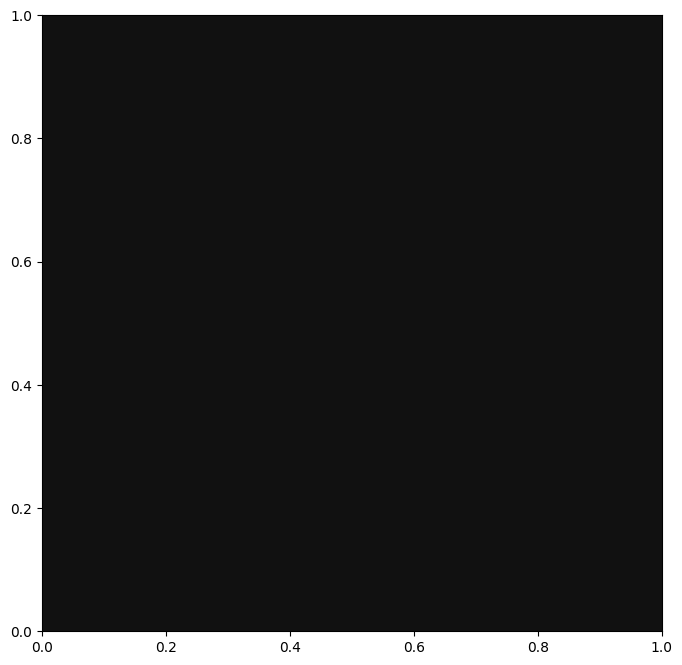

In [37]:
G_directed_graph = ox.convert.to_digraph(G0)
G_to_plot = nx.MultiDiGraph()
G_to_plot.add_nodes_from(G_directed_graph.nodes)
G_to_plot.add_edges_from(G_directed_graph.edges.data())
ox.plot_graph(G_to_plot)

In [36]:
G_directed_graph.graph["crs"]

'epsg:4326'

TypeError: OutEdgeView.__call__() got an unexpected keyword argument 'keys'

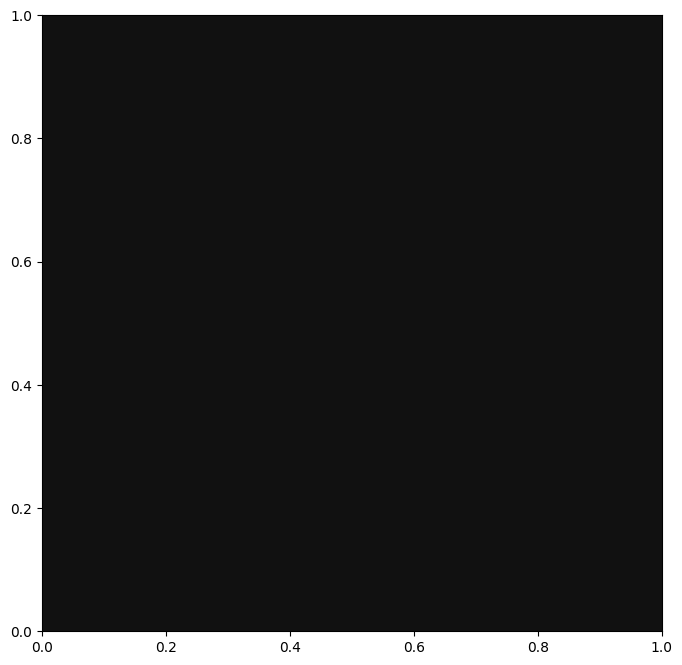

In [35]:
ox.plot_graph(G_directed_graph)

In [ ]:
G_proj = ox.project_graph(G_digraph)

KeyError: 'crs'

In [ ]:
G_proj.graph["crs"]

KeyError: 'crs'

In [28]:
with open("solutions\\y_sol_period_1.json", "r") as f:
    y_sol_1 = {ast.literal_eval(key): value for key, value in json.load(f).items()}

with open("solutions\\z_sol_period_1.json", "r") as f:
    z_sol_1 = {ast.literal_eval(key): value for key, value in json.load(f).items()}

KeyError: 'crs'

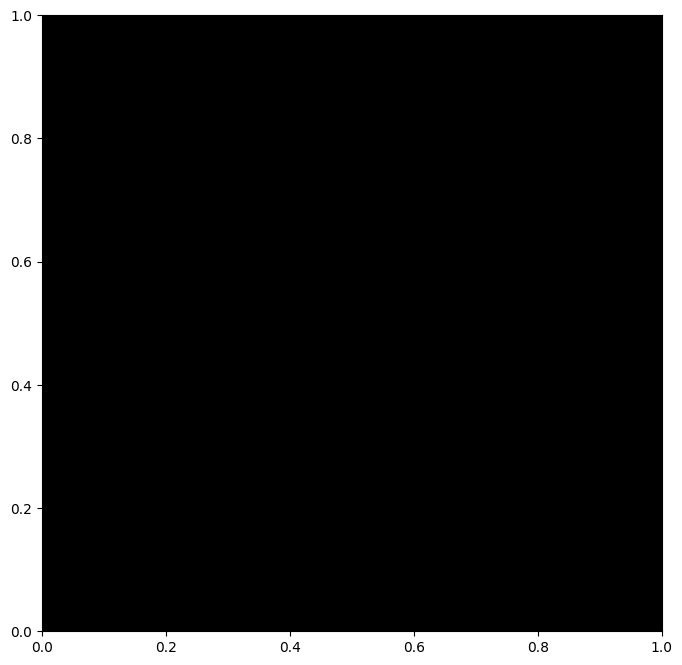

In [ ]:
node_colors = []
for node in G_digraph.nodes:
    if node in treatment_nodes:
        if y_sol_1[node] == 1:
            node_colors.append("yellow")
        else:
            node_colors.append("gray")
    elif node in source_nodes:
        node_colors.append("#336699")
    else: # Uh-oh! All nodes should be either a treatment node or a source node.
        node_colors.append("magenta")

edge_colors = ['white' if z_sol_1[*e] == 1 else 'purple' for e in G_digraph.edges]

# node_colors = ['r' if node in treatment_nodes else '#336699' for node in G.nodes()]

node_sizes = [50 if node in treatment_nodes else 15 for node in G_digraph.nodes]

ox.plot_graph(G_digraph, node_color=node_colors, node_size=node_sizes, edge_color=edge_colors, edge_linewidth=1, bgcolor="#000000")

In [ ]:
G_digraph.graph["crs"]

KeyError: 'crs'

In [3]:
y_sol

{59128065: 1.0,
 59133314: 1.0,
 59116291: 0.0,
 59121412: 0.0,
 59081605: 0.0,
 59126150: 1.0,
 59133192: 1.0,
 59117577: 0.0,
 59091084: 1.0,
 59123853: 1.0,
 59110286: 1.0,
 59116300: 0.0,
 59129101: 0.0,
 59146899: 1.0,
 59095700: 0.0,
 59124248: 0.0,
 59096602: 0.0,
 59110431: 0.0,
 59079200: 1.0,
 3584201894: 0.0,
 4231830135: 1.0,
 59123881: 1.0,
 59101100: 0.0,
 59079983: 0.0,
 59090484: 1.0,
 59146293: 1.0,
 59129525: 1.0,
 59118652: 1.0,
 59103172: 0.0,
 59101385: 1.0,
 59146313: 0.0,
 59110347: 0.0,
 59158864: 1.0,
 59133777: 1.0,
 59146231: 1.0,
 59080788: 0.0,
 59081566: 1.0,
 9941438054: 1.0,
 59147494: 1.0,
 59124459: 1.0,
 59115372: 1.0,
 59153773: 1.0,
 4230838774: 1.0,
 59164150: 0.0,
 59113465: 0.0,
 59107322: 1.0,
 59097341: 1.0}